<a href="https://colab.research.google.com/github/vanshikagoyal6396/MLCOE_TASK_/blob/main/RegressionTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/50_Startups.csv')

In [ ]:
print(df)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
df.isnull().sum()

R&D Spend          12
Administration     18
Marketing Spend     0
State               0
Profit              0
dtype: int64

***FILLING THE BLANK VALUES***

we are using mode because these are the top 50 startups so the frequency of values are al most the same

In [ ]:
df['R&D Spend'] = df['R&D Spend'].fillna(df['R&D Spend'].mode()[0])
df['Administration'] = df['Administration'].fillna(df['Administration'].mode()[0])


In [ ]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

***CHECKING THE DUPLICATED VALUE***

In [ ]:
df[df.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


There is no duplicate values

***PAIR PLOT***

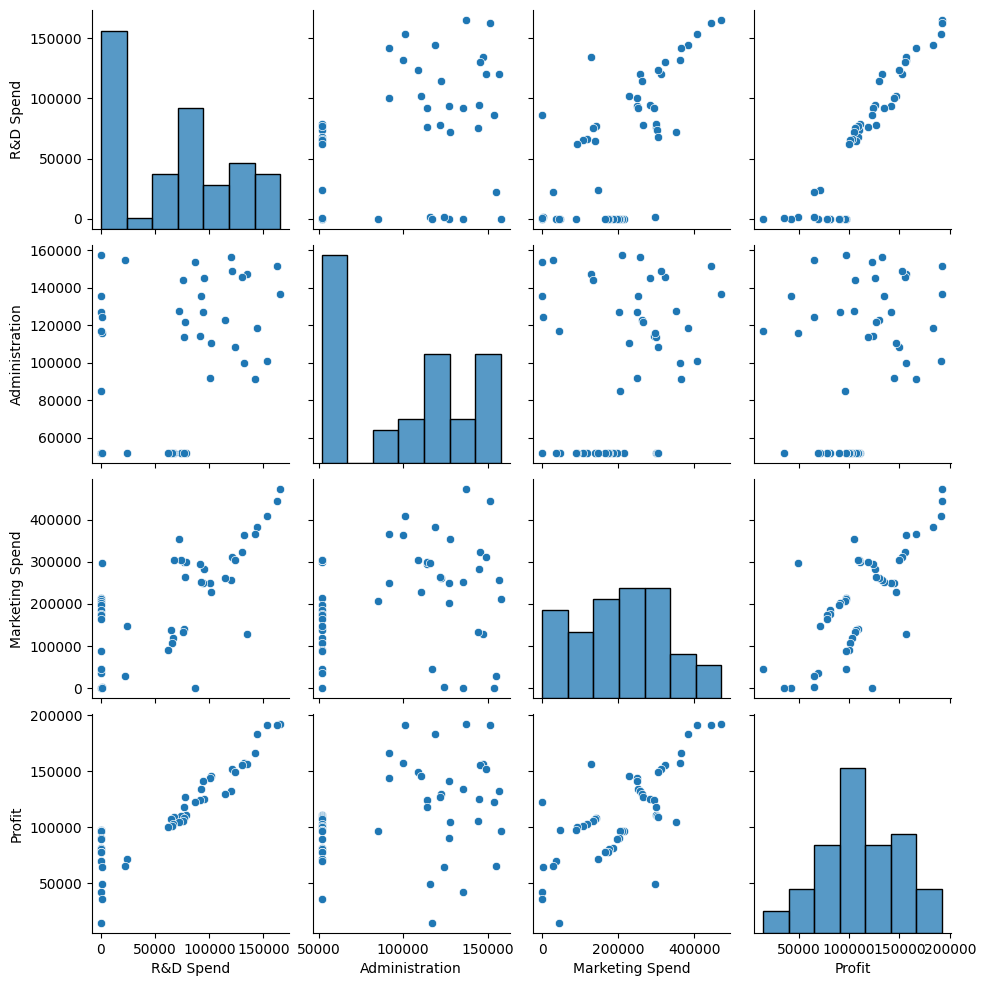

In [ ]:
sns.pairplot(df)

<ipython-input-33-91c85df46065>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)    #get_xticklabels is used for reteriving the axes values
<ipython-input-33-91c85df46065>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)    #it sets the x axis lables by rotation of 90 degree
<ipython-input-33-91c85df46065>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(axes[0].get_xticklabels(),rotation=90)


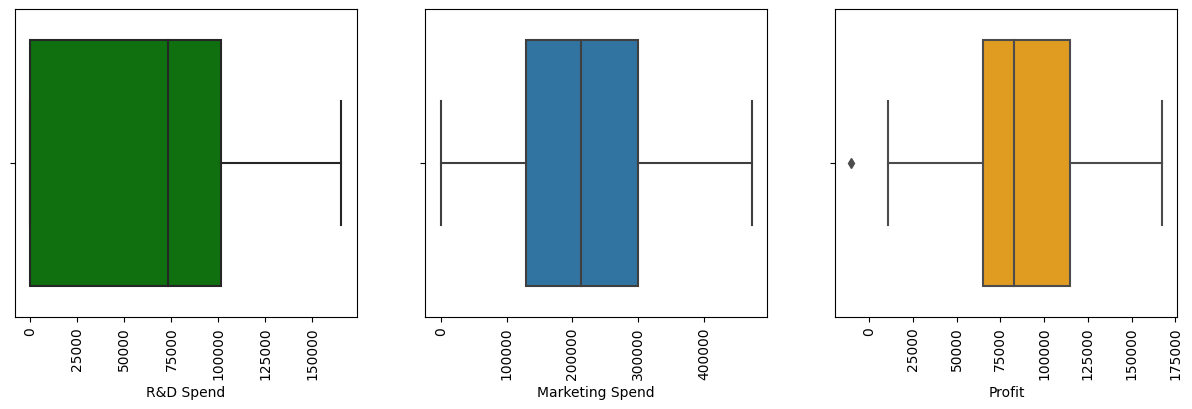

In [ ]:
fig,axes=plt.subplots(1,3,figsize = (15,4))
sns.boxplot(x = 'R&D Spend', data = df, ax = axes[0],color='green')
sns.boxplot(x = 'Marketing Spend', data = df, ax = axes[1])
sns.boxplot(x = 'Profit', data = df, ax = axes[2],color='orange')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)    #get_xticklabels is used for reteriving the axes values
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)    #it sets the x axis lables by rotation of 90 degree
axes[2].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
plt.show()

there is no outlier in R&D spend and Marketing spend

there is a outlier in the profit

<ipython-input-11-eea41d753bf8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

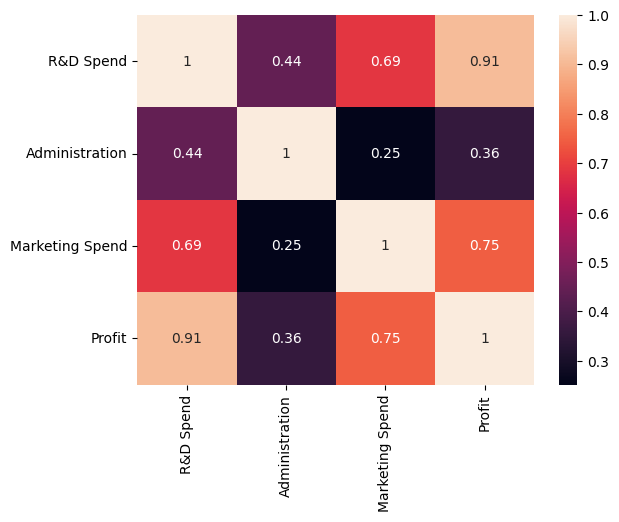

In [ ]:
corr = df.corr()
sns.heatmap(corr,annot=True)

**COUNT THE NUMBER OF STATES**

In [ ]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

relation between the marketing spend and the profit

In [ ]:
df.groupby('State')['Marketing Spend'].mean().reset_index()

,State,Marketing Spend
0,California,182540.929412
1,Florida,247323.551250
2,New York,205346.015882


MARKETING SPEND IN FLORIDA IS MORE THAN COMPARED TO OTHER TWO STATES

In [ ]:
df.groupby('State')['Profit'].mean().reset_index()

,State,Profit
0,California,103905.175294
1,Florida,118774.024375
2,New York,113756.446471


AS THE MARKETING SPEND OF FLORIDA IS MORE, THEN THE PROFIT OF FLORIDA IS MORE THAN COMPARED TO OTHER TWO STATES

***ONE HOT ENCODING***

IT CONVERTS THE CATEGOTICAL DATA INTO NUMERICAL DATA

In [ ]:
#get dummies column create duplicate column foe each unique category
#prefix and prfix_sep are empty strings so that only  dummy column names will have original category names.
#prefix removes the prefix state and prefix_sep removes the _ of the dummy columns
df_encoded = pd.get_dummies(df, columns=['State'],prefix='',prefix_sep='',dtype=int)
df_encoded.head()


,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [ ]:
# it will give the list of all the columns including original and the dummy columns
df_encoded.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'California', 'Florida', 'New York'],
      dtype='object')

In [57]:
#it is done to swaping the columns for further training of data
#here we are swapping the profit with new york
df_encoded['Profit'], df_encoded['New York'] = df_encoded['New York'].copy(), df_encoded['Profit'].copy()
df_refined=df_encoded.rename(columns={'Profit': 'New York', 'New York': 'Profit'})

In [58]:
df_refined.head()

,R&D Spend,Administration,Marketing Spend,New York,California,Florida,Profit
0,165349.20,136897.80,471784.10,1,0,0,192261.83
1,162597.70,151377.59,443898.53,0,1,0,191792.06
2,153441.51,101145.55,407934.54,0,0,1,191050.39
3,144372.41,118671.85,383199.62,1,0,0,182901.99
4,142107.34,91391.77,366168.42,0,0,1,166187.94


***IMPORTING TRAIN _TEST FROM SKLEARN AND SPLITING THEM***

In [66]:
x=df_refined.iloc[:,:-1].values        #iloc is used foe index based inexing
                              #values function fives the anwer in numpy array form
y=df_refined.iloc[:,-1].values
# x is independent variable and y is dependent variable
#x have all the rows and columns except last column
#y have alll the rows nd only -1 column(profit) or target column

In [67]:
x

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2333488e+05, 1.0867917e+05,

In [68]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [69]:
df_refined.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'New York',
       'California', 'Florida', 'Profit'],
      dtype='object')

In [75]:
#splitting variables into traing and testing with test size of 20% of actual dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

**CHECKING THE SHAPE OF TRAIN AND TEST VARIABLES AFTER SPLITTING**

In [76]:
x_train.shape

(40, 6)

In [77]:
x_test.shape

(10, 6)

In [78]:
y_train.shape

(40,)

In [79]:
y_test.shape

(10,)

In [80]:
from sklearn.linear_model import LinearRegression

In [82]:
#LinearRegression is a class of sklearn
#lr is trained to fit two parameters X-train,y_train
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [85]:
x_test

array([[6.6051520e+04, 5.1743150e+04, 1.1814820e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0067196e+05, 9.1790610e+04, 2.4974455e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0191308e+05, 1.1059411e+05, 2.2916095e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 5.1743150e+04, 1.6447071e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [7.2107600e+04, 1.2786455e+05, 3.5318381e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 5.1743150e+04, 1.8526510e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 5.1743150e+04, 8.8218230e+04, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.3994560e+04, 5.1743150e+04, 3.0331926e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.4210734e+05, 9.1391770e+04,

In [86]:
x_train

array([[0.0000000e+00, 5.1743150e+04, 2.1463481e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 8.5047440e+04, 2.0551764e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.5328870e+04, 1.4413598e+05, 1.3405007e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.5769392e+05, 2.1079767e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [9.1749160e+04, 1.1417579e+05, 2.9491957e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.1994324e+05, 1.5654742e+05, 2.5651292e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0002300e+03, 1.2415304e+05, 1.9039300e+03, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.4205000e+02, 5.1743150e+04, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.5605480e+04, 5.1743150e+04,

In [87]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [88]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [93]:
y_pred =lr.predict(x_test)



In [94]:
y_pred

array([101882.85435551, 136489.50238597, 130405.31792982,  70039.91629356,
       174891.42699403, 128037.80635853,  74906.81987493,  66115.72186274,
       122990.67107359, 165106.23927702])

In [98]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score

In [96]:
mean_absolute_error(y_test,y_pred)

12324.36284585589

In [100]:
mean_absolute_percentage_error(y_test,y_pred)          #it tells the accuracy of the model
#It calculates the average percentage difference between the predicted and actual values.

0.10992354409418673

In [99]:
r2_score(y_test,y_pred)    #it evalute the performance of the model, it ranges from -1 to 1
                           #also known as cofficient of determination and tells the goodness of fit

0.8165736016580384